In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
matmul_4090_run = pd.read_csv(
    f"matmul_RTX4090_gpu_with_freq.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "energy", "frequency", ""]
)
matmul_4090_run["throughput"] = (
    matmul_4090_run["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_4090_run.set_index(["M", "N", "K"], inplace=True)

matmul_6000ada_run = pd.read_csv(
    f"matmul_RTX6000Ada_gpu_tmp2.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "energy", "frequency", ""]
)
matmul_6000ada_run["throughput"] = (
    matmul_6000ada_run["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_6000ada_run.set_index(["M", "N", "K"], inplace=True)

matmul_l4_run = pd.read_csv(
    f"matmul_L4_gpu_tmp1.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "energy", "frequency", ""]
)
matmul_l4_run["throughput"] = (
    matmul_l4_run["throughput"].str.extract(r"(\d+\.?\d*)").astype(float)
)
matmul_l4_run.set_index(["M", "N", "K"], inplace=True)

color_NV = sns.color_palette("Greens_d", 4)[1:]

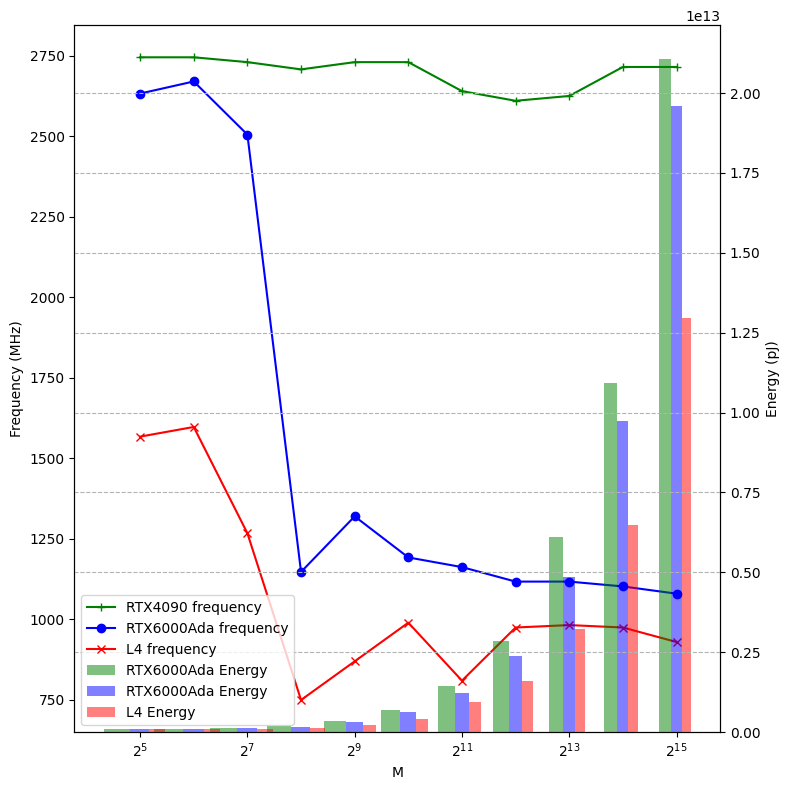

<Figure size 640x480 with 0 Axes>

In [25]:
K = 12288
N = K
title = f"Performance of Matmul with K={K}, N={N}"
M_list = []


frequency_4090_run_list = []
energy_4090_run_list = []
frequency_6000ada_run_list = []
energy_6000ada_run_list = []
frequency_l4_run_list = []
energy_l4_run_list = []
for M in range(5, 16):
    M = 2**M
    M_list.append(M)
    frequency_4090_run_list.append(matmul_4090_run.loc[(M, N, K), "frequency"])
    energy_4090_run_list.append(matmul_4090_run.loc[(M, N, K), "energy"])
    frequency_6000ada_run_list.append(matmul_6000ada_run.loc[(M, N, K), "frequency"])
    energy_6000ada_run_list.append(matmul_6000ada_run.loc[(M, N, K), "energy"])
    frequency_l4_run_list.append(matmul_l4_run.loc[(M, N, K), "frequency"])
    energy_l4_run_list.append(matmul_l4_run.loc[(M, N, K), "energy"])

fig, ax1 = plt.subplots(figsize=(8, 8))

ax1.set_xscale("log", base=2)
ax1.set_xlabel("M")
ax1.plot(M_list, frequency_4090_run_list, marker="+", label=f"RTX4090 frequency", color='green')
ax1.plot(M_list, frequency_6000ada_run_list, marker="o", label=f"RTX6000Ada frequency", color='blue')
ax1.plot(M_list, frequency_l4_run_list, marker="x", label=f"L4 frequency", color='red')
ax1.set_ylabel('Frequency (MHz)')

ax2 = ax1.twinx()
#ax2.set_yscale("log")
M_list = np.array(M_list)
bar_widths = ((M_list - 2**4) * 2) / np.log2(M_list - 2**4)
ax2.set_ylabel('Energy (pJ)')

ax2.bar(M_list - (bar_widths), energy_4090_run_list, width = bar_widths, label='RTX6000Ada Energy', color='green', alpha=0.5)
ax2.bar(M_list, energy_6000ada_run_list, width = bar_widths, label='RTX6000Ada Energy', color='blue', alpha=0.5)
ax2.bar(M_list + (bar_widths), energy_l4_run_list, width = bar_widths, label='L4 Energy', color='red', alpha=0.5)

ax2.plot([], [], marker="+", label=f"RTX4090 frequency", color='green')
ax2.plot([], [], marker="o", label=f"RTX6000Ada frequency", color='blue')
ax2.plot([], [], marker="x", label=f"L4 frequency", color='red')

ax2.legend(loc='lower left')

plt.grid(True, which="both", ls="--", c="0.7")  # Adding a grid for better readability
plt.tight_layout()
plt.show()
plt.savefig("figure5b.pdf", bbox_inches="tight", pad_inches=0.01, dpi=300)